# Kaggle: Housing Prices 

In this notebook we explore the [housing prices kaggle challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) with Google Colab.  


This is the second notebook in the housing prices kaggle challenge.  Here we explore ML techniques for performing the regression.



To begin, we will clone the repo to have access to the kaggle dataset.

In [1]:
!git clone https://github.com/demarley/figment

Cloning into 'figment'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 38 (delta 10), reused 25 (delta 4), pack-reused 0
Unpacking objects: 100% (38/38), done.


## ML Techniques

Let's explore some ML techniques for doing the regression.

I've only used a few of these techniques (briefly) in my own physics analyses.  As such, I will take some time to work with the scikit-learn API to get a better understanding of what's going on.

_When we did use these techniques, it was only to prove that we could easily outperform our 'basic' analysis techniques. However, once we started testing Boosted Decision Trees and Neural Networks, we never looked back._

In [0]:
# plotting
import matplotlib.style
import matplotlib as mpl
mpl.style.use("default")
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# doing stuff
import numpy as np
import pandas as pd

In [0]:
df = pd.read_csv("figment/data/housing_prices/train.csv"); # specific to my setup

### Data Cleaning 

From the previous notebook, we know there are changes we can make to the dataset.  For now we won't do those here.  We will just leave the features that are textual alone for the time being.  Instead of changing those values, let's again look at the correlation matrix and choose some of the more correlated features.

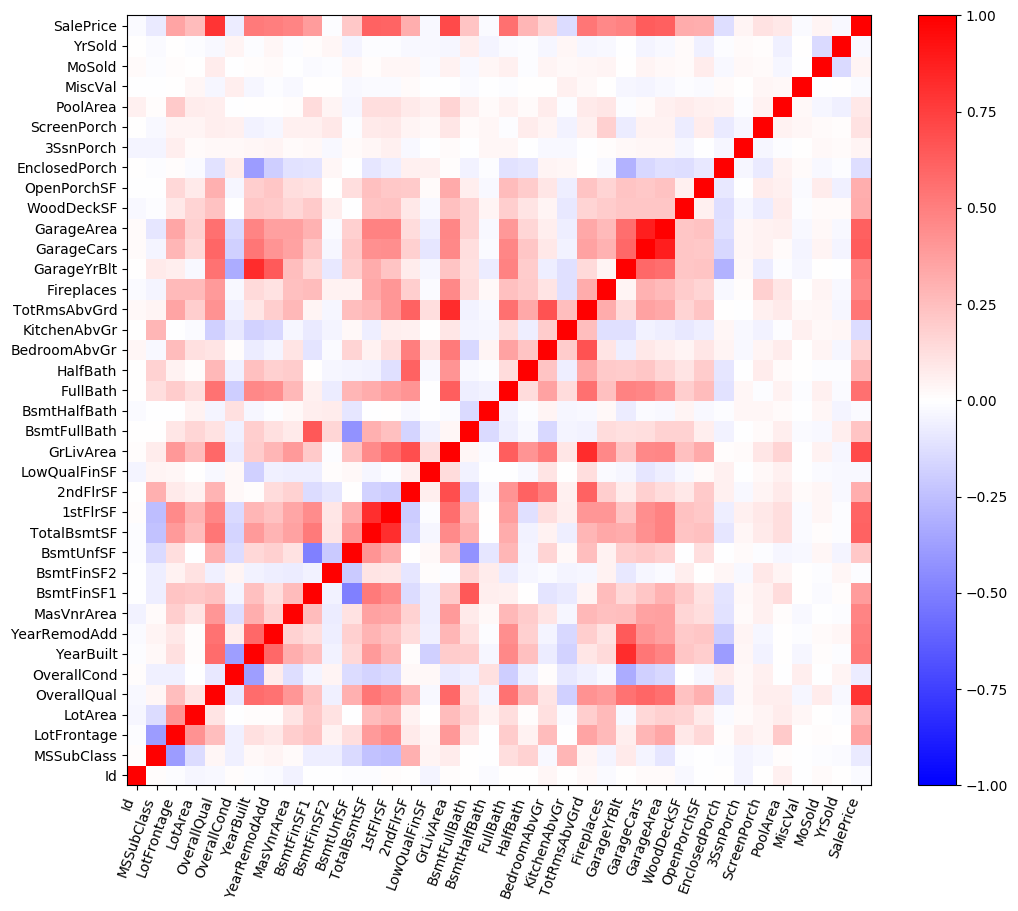

In [8]:
corrmat = df.corr()

fig,ax  = plt.subplots(figsize=(12,10))

opts    = {'cmap':plt.get_cmap("bwr"),'vmin':-1,'vmax':1}
heatmap = plt.pcolor(corrmat, **opts)
cbar    = plt.colorbar(heatmap, ax=ax)

labels = corrmat.columns.values

# shift location of ticks to center of the bins
ax.set_xticks(np.arange(len(labels))+0.5, minor=False);
ax.set_yticks(np.arange(len(labels))+0.5, minor=False);
ax.set_xticklabels(labels, fontsize=10, minor=False, ha='right', rotation=70);
ax.set_yticklabels(labels, fontsize=10, minor=False);

From this correlation matrix, let's choose some of the features most strongly correlated with `SalePrice`.  Then, split the data into a `training` and `validation` sets.

This attempt will use a somewhat random pick of features.  We'll just look at features that have correlations greater than 0.25 with `SalePrice`.

In [58]:
strong_corrs = corrmat[np.abs(corrmat.SalePrice)>0.25].SalePrice
features = list(strong_corrs.index)
_ = features.remove("SalePrice")   # remove the target value from the inputs!
print(features)
print(strong_corrs.sort_values())

['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
LotFrontage     0.351799
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [0]:
# split into test and training 
from sklearn.model_selection import train_test_split

df  = df.fillna(-1)
tmp = df.sample(frac=1) # shuffle the dataframe rows
tts = train_test_split(df[features].values,\
                       df['SalePrice'].values, \
                       test_size=0.25)
X_train,X_test,Y_train,Y_test = tts

### Nearest Neighbors

First we'll try predicting the housing price using nearest neighbors regression.

**Description of method**

In [0]:
# Load the module from scikit-learn
from sklearn import neighbors

In [0]:
n_neighbors = 5
weights = 'uniform'

knn  = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
fknn = knn.fit(X_train, Y_train)
predictions = fknn.predict(X_test)

Distribution = 0.063 $\pm$ 0.3106


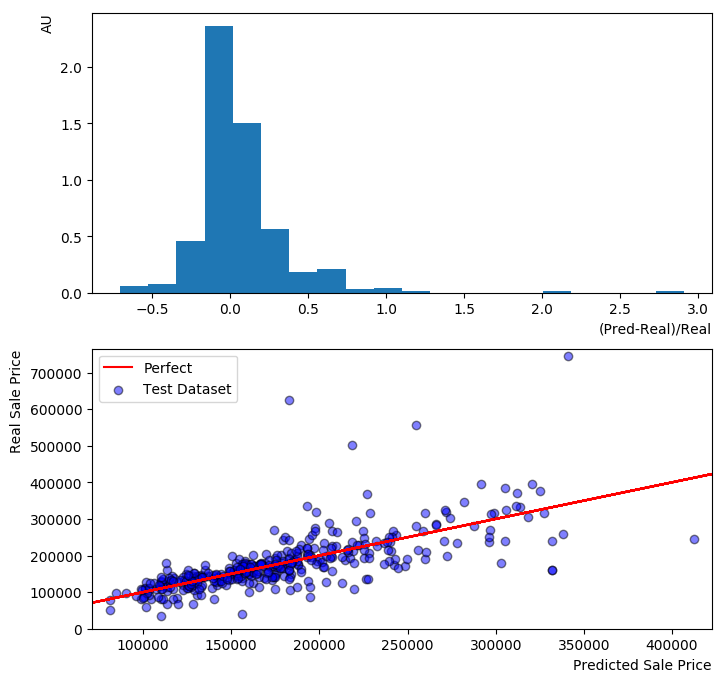

In [64]:
# Prediction: y=m*x+b
X_val = X_test.copy()
values = np.divide((np.asarray(predictions) - Y_test),Y_test)

fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

print(r"Distribution = {0:.3f} $\pm$ {1:.4f}".format(np.mean(values),np.std(values)))

Let's see how changing the `n_neighbors` parameter affects the results.

In [0]:
n_neighbors = 10
knn  = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
fknn = knn.fit(X_train, Y_train)
predictions = fknn.predict(X_test)

Distribution = 0.060$\pm0.3021


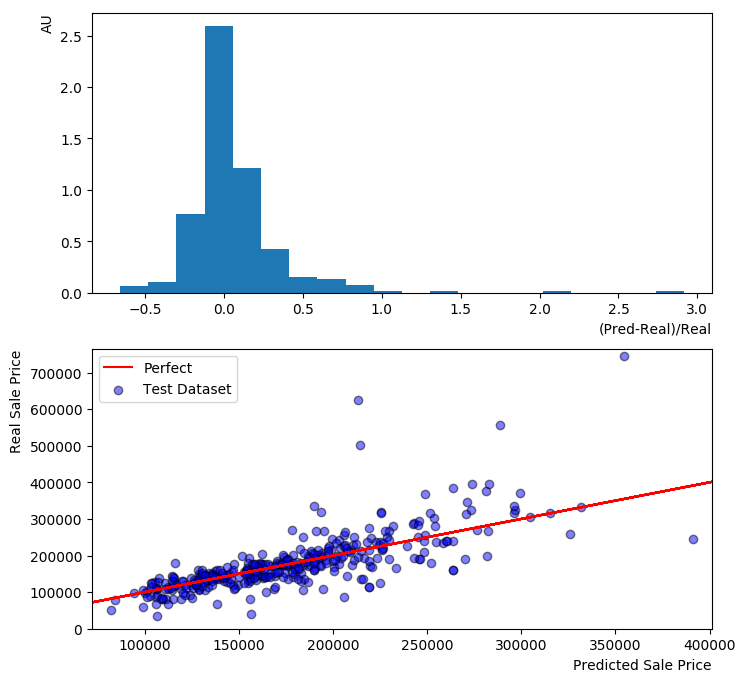

In [66]:
# Prediction
values = np.divide((np.asarray(predictions) - Y_test),Y_test)

fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

print(r"Distribution = {0:.3f}$\pm{1:.4f}".format(np.mean(values),np.std(values)))

In [0]:
n_neighbors = 7
knn  = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
fknn = knn.fit(X_train, Y_train)
predictions = fknn.predict(X_test)

Distribution = 0.060$\pm0.3130


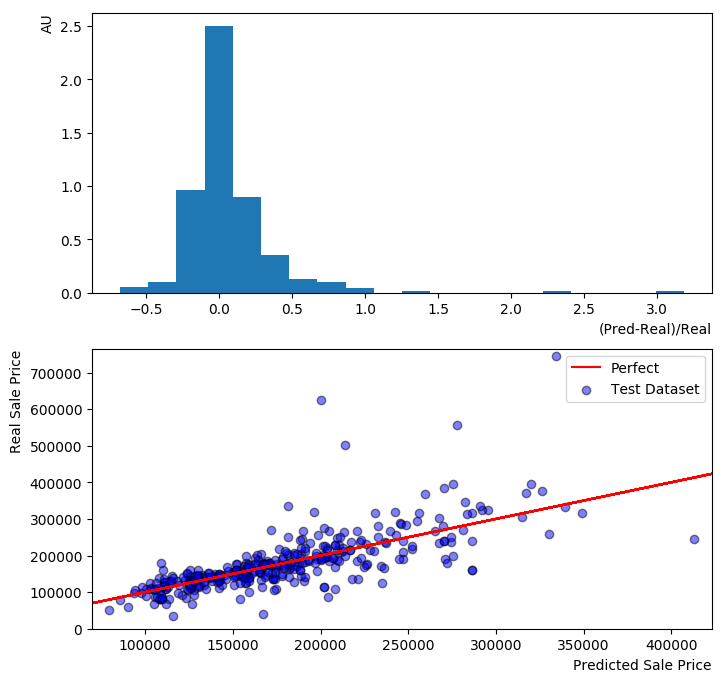

In [68]:
# Prediction
values = np.divide((np.asarray(predictions) - Y_test),Y_test)

fig,ax = plt.subplots(2,1,figsize=(8,8))

plt.subplot(2,1,1)
plt.hist(values,bins=20,normed=True)
plt.xlabel("(Pred-Real)/Real",position=(1,0),ha='right')
plt.ylabel("AU",position=(0,1),ha='right')

plt.subplot(2,1,2)
plt.scatter(predictions,Y_test,color='b',edgecolor='k',alpha=0.5,label="Test Dataset");
plt.plot(Y_test,Y_test,color='r',label="Perfect")
plt.xlim(min(predictions)-10000,max(predictions)+10000)
plt.ylim(0,max(Y_test)+20000)
plt.xlabel("Predicted Sale Price",position=(1,0),ha='right')
plt.ylabel("Real Sale Price",position=(0,1),ha='right')
plt.legend()

print(r"Distribution = {0:.3f}$\pm{1:.4f}".format(np.mean(values),np.std(values)))

### Support Vector Machines

### Random Forest

## Deep Learning

In the next notebook, I will explore `keras+tensorflow` and some `pytorch` to perform the regression.